In [1]:
import numpy as np
import scipy as sp
from scipy.special import jv
import matplotlib
from matplotlib import pyplot as plt
import random as rand
import math

# Wiener Process

## !!! returns both the variable as a function of time as well as the normally distributed samples of delta z at each time step !!!

In [2]:
def wienerProcess(N, T): # total setps, total time
    output = [0.0]
    last_step = 0
    dt = T/N # calculate dt from the total time and total steps
    for i in range(0,N):
        eps = rand.gauss(0,1)
        delta_z = eps*np.sqrt(dt)
        output.append(delta_z)
    delta_z = output
    output = np.cumsum(np.array(delta_z))
    return output, delta_z 

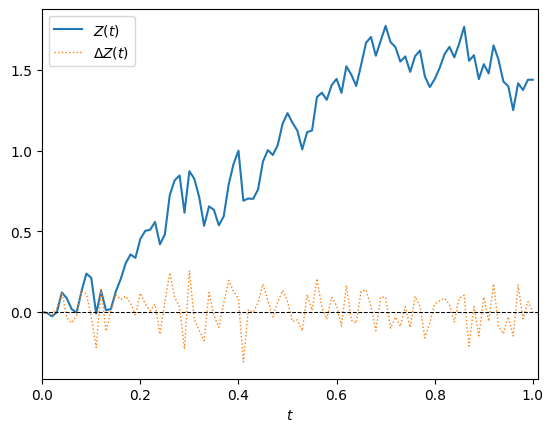

In [94]:
# quick test
T = 1
N = 100
zOFt,delta_z_OFt = wienerProcess(N,T)
t = np.linspace(0,T,N+1)
plt.plot(t,zOFt,label=r'$Z(t)$')
plt.plot(t,delta_z_OFt,linestyle = 'dotted',linewidth=1,label=r'$\Delta Z(t)$')
plt.hlines(0,-1,2*T, linestyle='dashed',linewidth=0.75,color='k')
plt.xlim(-0.001,T+T*0.01)
plt.xlabel(r'$t$')
plt.legend(loc='best')
plt.show()

# Generalized Wiener Process

In [6]:
def generalizedWienerProcess(N, T, a, b): # total setps, total time
    output = [0.0]
    last_step = 0
    dt = T/N # calculate dt from the total time and total steps
    for i in range(0,N):
        eps = rand.gauss(0,1)
        delta_x = a*dt + b*eps*np.sqrt(dt)
        output.append(delta_x)
    delta_x = output
    output = np.cumsum(np.array(delta_x))
    return output, delta_x

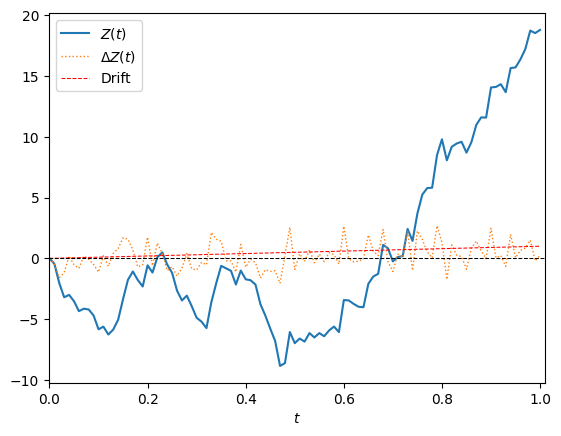

In [104]:
# quick test
T = 1
N = 100
a = 1
b = 10
xOFt,delta_x_OFt = generalizedWienerProcess(N,T,a,b)
t = np.linspace(0,T,N+1)
drift = a*t

plt.plot(t,xOFt,label=r'$Z(t)$')
plt.plot(t,delta_x_OFt,linestyle = 'dotted',linewidth=1,label=r'$\Delta Z(t)$')
plt.plot(t,drift, linestyle='dashed',linewidth=0.75,color='r',label='Drift')
plt.hlines(0,-1,2*T, linestyle='dashed',linewidth=0.75,color='k')
plt.xlim(-0.001,T+T*0.01)
plt.xlabel(r'$t$')
plt.legend(loc='best')
plt.show()

# "Direct" Ito Process

### First, a few functions that can be passed in for a(x,t) and b(x,t)

In [23]:
# WRAPPER FUNCTIONS FOR a AND b
def A(x,t,params,func):
    return func(x,t,params)
def B(x,t,params,func):
    return func(x,t,params)

# FUNCTIONS
def Const(x,t,C):
    return C
def oscillate(x,t,params):
    norm,scale,phase = params
    return norm*math.cos(t*scale + phase)
def bessel(x,t,params):
    norm,scale,phase,order = params
    return norm*jv(order,t*scale + phase)
def damped_oscillate(x,t,params):
    norm,scale,phase,lifetime = params
    return norm*math.sin(t*scale + phase)*math,exp(-t/lifetime)

In [84]:
def directItoProcess(N, T, Aparams, Afunc, Bparams, Bfunc): # total setps, total time
    output = [0.0]
    delta_x = []
    last_step = 0
    dt = T/N # calculate dt from the total time and total steps
    
    eps = rand.gauss(0,1)
    t = dt
    x = 0
    a = A(x,t,Aparams,Afunc)
    b = B(x,t,Bparams,Bfunc)
    dx = a*dt + b*eps*np.sqrt(dt)
    delta_x.append(dx)
    
    for i in range(1,N):
        eps = rand.gauss(0,1)
        x = np.cumsum(delta_x)[-1]
        t = dt*i+dt
        a = A(x,t,Aparams,Afunc)
        b = B(x,t,Bparams,Bfunc)
        dx = a*dt + b*eps*np.sqrt(dt)
        delta_x.append(dx)
    output.extend(delta_x)
    output = np.cumsum(np.array(output))
    delta_x = np.array(delta_x)
    return output, delta_x

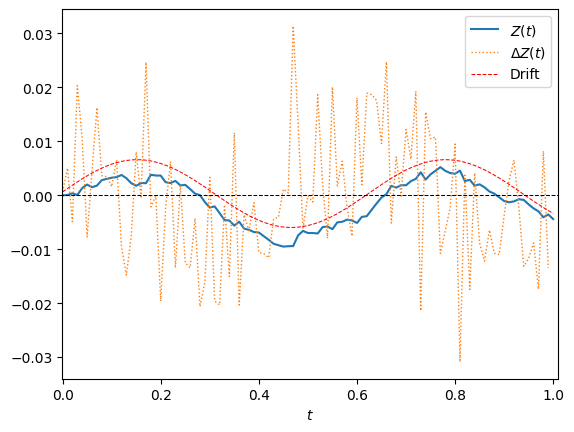

In [105]:
# quick test
N = 100
T = 1

#oscillate for drift
Afunc = oscillate
Aparams = (1,10,0)

#constant for Wiener
Bfunc = Const
Bparams = 0.1

xOFt,delta_x_OFt = directItoProcess(N,T,Aparams,Afunc,Bparams,Bfunc)
integNorm = (2*np.pi)/N
t = np.linspace(0,T,N+1)
drift = np.array([Afunc(xOFt[i],tt,Aparams)*(T/N) for i,tt in enumerate(t)])
drift = np.cumsum(drift)*integNorm

plt.plot(t,xOFt*integNorm,label=r'$Z(t)$')
plt.plot(t[:N],delta_x_OFt,linestyle = 'dotted',linewidth=1,label=r'$\Delta Z(t)$')
plt.plot(t,drift, linestyle='dashed',linewidth=0.75,color='r',label='Drift')
plt.hlines(0,-1,2*T, linestyle='dashed',linewidth=0.75,color='k')
plt.xlim(-0.001,T+T*0.01)
plt.xlabel(r'$t$')
plt.legend(loc='best')
plt.show()

In [91]:
np.amax(zOFt)

1.6883208167000692

In [90]:
2*np.pi

6.283185307179586